**Unsupervised Machine Learning Assignment**

Produced by: Ellie Miller




While I had intended to use the ATL06 data product from NASA's IceSAT-2 Mission, I ran into significant issues downloading and reading in the data to Google Collab Pro. Due to this, I pivoted to using a dataset from Kaggle called World Glacier Inventory (https://www.kaggle.com/datasets/nsidcorg/glacier-inventory).

The World Glacier Inventory contains information for over 130,000 glaciers. Inventory parameters include geographic location, area, length, orientation, elevation, and classification. The WGI is based primarily on aerial photographs and maps with most glaciers having one data entry only. The data set can be viewed as a snapshot of the glacier distribution in the second half of the twentieth century. It was founded on the original WGI from the World Glacier Monitoring Service. This dataset is publically available on Kaggle.

In [37]:
# Connect to Github
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Cloning into 'datascience'...


**Set Up**

In [2]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile

# Access the API to load the dataset and save it as a ZIP
!kaggle datasets download -d nsidcorg/glacier-inventory

# Extract the ZIP file
with zipfile.ZipFile("glacier-inventory.zip", 'r') as zip_ref:
    zip_ref.extractall("glacier_data")

Dataset URL: https://www.kaggle.com/datasets/nsidcorg/glacier-inventory
License(s): CC0-1.0
glacier-inventory.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Load the database file
worldglacierinventory = pd.read_csv('glacier_data/worldglacierinventory.csv')

<ipython-input-3-ecbc4ebc1111>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  worldglacierinventory = pd.read_csv('glacier_data/worldglacierinventory.csv')


**Initial Exploratory Data Analysis (EDA)**

In [4]:
worldglacierinventory.shape

(132890, 39)

There are 132,890 rows in this dataset, which means there are 132,890 individuals glacier represented. I would say this dataset is on the larger side.

In [5]:
worldglacierinventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132890 entries, 0 to 132889
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Glacier ID                   132890 non-null  object 
 1   Political Unit               132890 non-null  object 
 2   Continent                    132890 non-null  object 
 3   Basin Code                   132890 non-null  object 
 4   Location Code                132890 non-null  object 
 5   Glacier Code                 132890 non-null  object 
 6   Glacier Name                 46751 non-null   object 
 7   Latitude                     132890 non-null  float64
 8   Longitude                    132890 non-null  float64
 9   Primary Class                131406 non-null  float64
 10  Glacier Source               132746 non-null  float64
 11  Basin Count                  15558 non-null   float64
 12  Glacier Form                 131813 non-null  float64
 13 

In [6]:
worldglacierinventory.describe()

,Latitude,Longitude,Primary Class,Glacier Source,Basin Count,Glacier Form,Glacier Activity,Activity Start,Activity End,Minimum Elevation,...,Mean Width,Mean Length,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Topographic Map Year,Topographic Map Scale,Photograph Year
count,132890.000000,132890.000000,131406.000000,132746.000000,15558.000000,131813.000000,132775.000000,4202.000000,143.000000,117162.000000,...,69966.000000,55258.000000,102593.000000,84621.000000,17051.000000,70071.000000,78685.000000,83697.000000,74586.000000,82464.000000
mean,36.322101,31.902296,5.716231,0.864712,1.031752,3.738918,0.620448,1967.112327,1986.930070,3502.362063,...,0.563436,1.392470,1.417326,1.328634,1.621133,28.415085,2.262960,1970.529565,96838.461508,1974.795899
std,27.821062,83.860643,1.768668,0.494326,0.327473,2.255064,1.072336,11.348193,6.999648,1735.317842,...,0.643816,2.087975,2.560785,1.984061,3.286073,46.480501,0.999009,10.276403,69675.200534,14.107653
min,-71.657200,-179.918000,0.000000,0.000000,1.000000,0.000000,0.000000,1901.000000,1958.000000,0.000000,...,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,1.000000,1901.000000,750.000000,1900.000000
25%,30.616000,-50.375000,6.000000,1.000000,1.000000,3.000000,0.000000,1963.000000,1986.000000,1800.000000,...,0.300000,0.500000,0.500000,0.500000,0.200000,12.000000,1.000000,1966.000000,50000.000000,1968.000000
50%,38.580000,75.484500,6.000000,1.000000,1.000000,4.000000,0.000000,1967.000000,1986.000000,3840.000000,...,0.400000,0.800000,0.800000,0.800000,0.600000,20.000000,2.000000,1972.000000,90000.000000,1971.000000
75%,49.223000,85.265750,7.000000,1.000000,1.000000,5.000000,1.000000,1975.000000,1988.000000,5020.000000,...,0.700000,1.510000,1.500000,1.500000,2.000000,36.000000,3.000000,1978.000000,100000.000000,1980.000000
max,89.300000,179.680000,9.000000,3.000000,7.000000,9.000000,8.000000,1996.000000,2002.000000,8047.000000,...,29.800000,76.640000,145.000000,125.000000,64.500000,7060.000000,5.000000,1998.000000,1000000.000000,2003.000000


**Removing Unhelpful Data**

In [7]:
# Select only the columns with useful data for ML approaches
worldglacierinventoryremove = worldglacierinventory[['Minimum Elevation', 'Mean Elevation', 'Maximum Elevation', 'Snow Line Elevation', 'Glacier Area', 'Mean Length', 'Mean Width', 'Mean Depth']]

# Remove any row with no data
worldglacierinventorycondense = worldglacierinventoryremove.dropna()
worldglacierinventorycondense.shape

(5019, 8)

If you remove columns that are not useful for unsupervised machine learning applications and NA values, then the size of the dataset drops significantly.

**Expanded EDA**

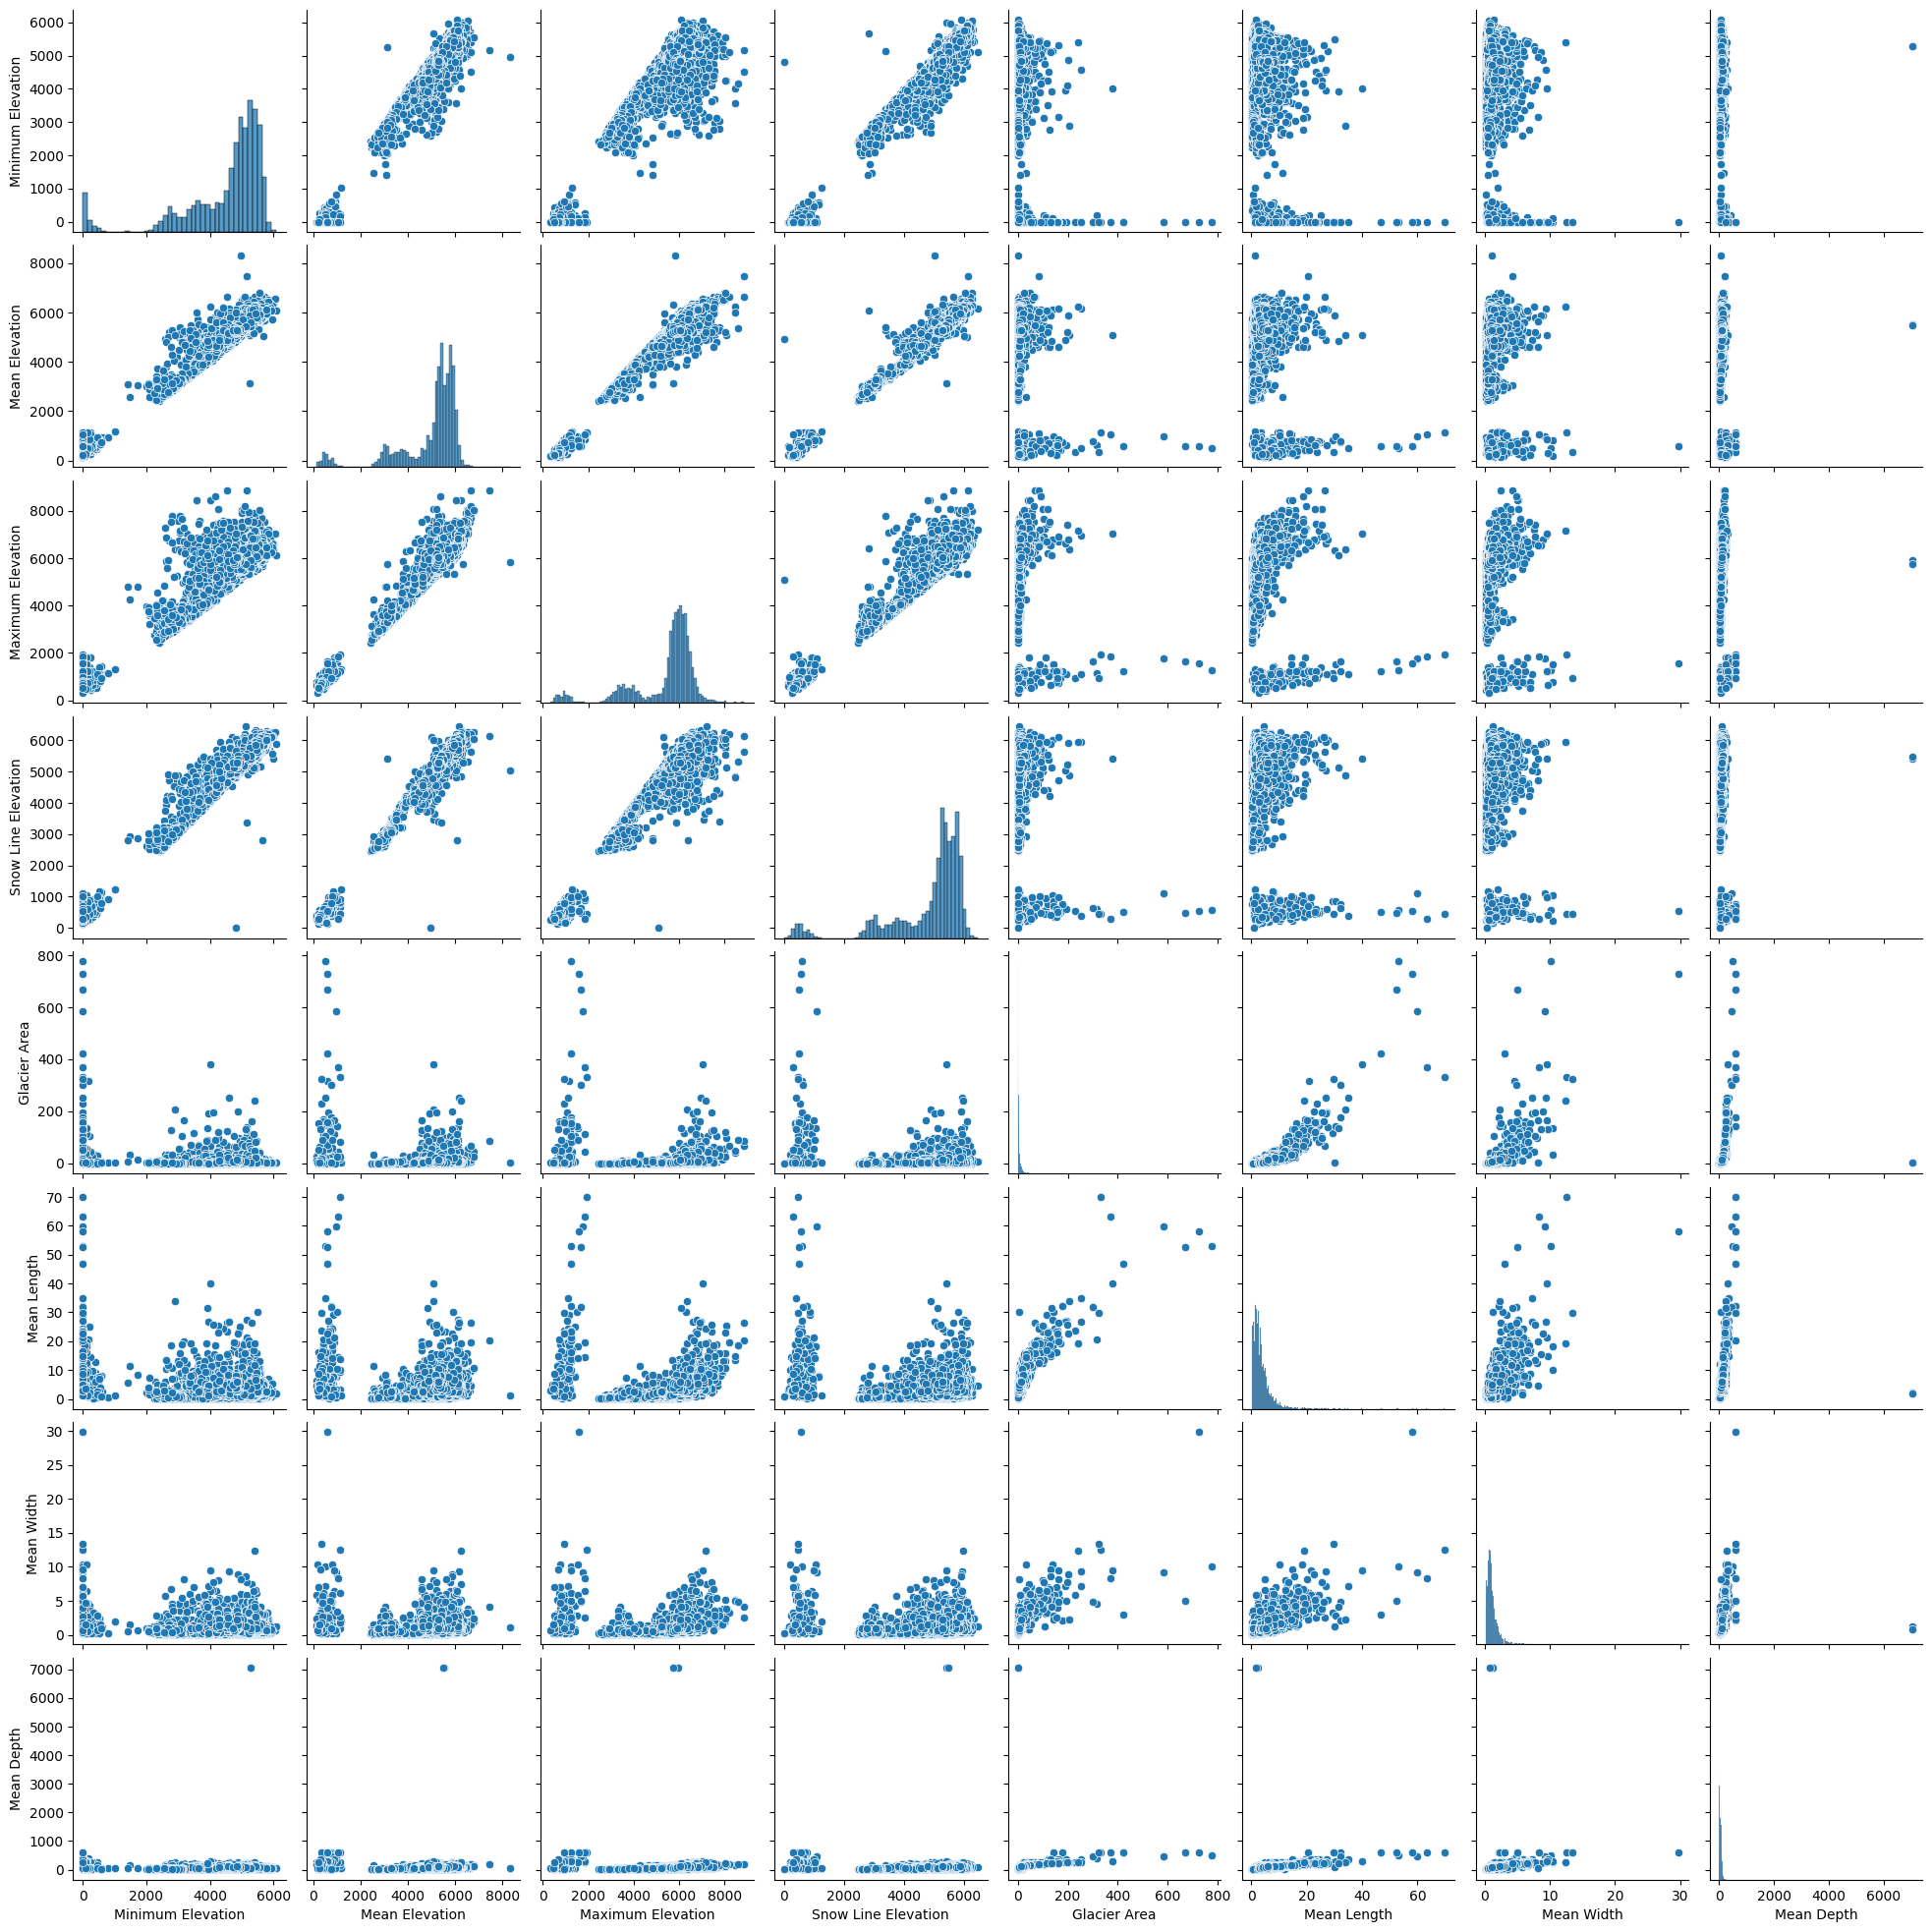

In [8]:
sns.pairplot(worldglacierinventorycondense)

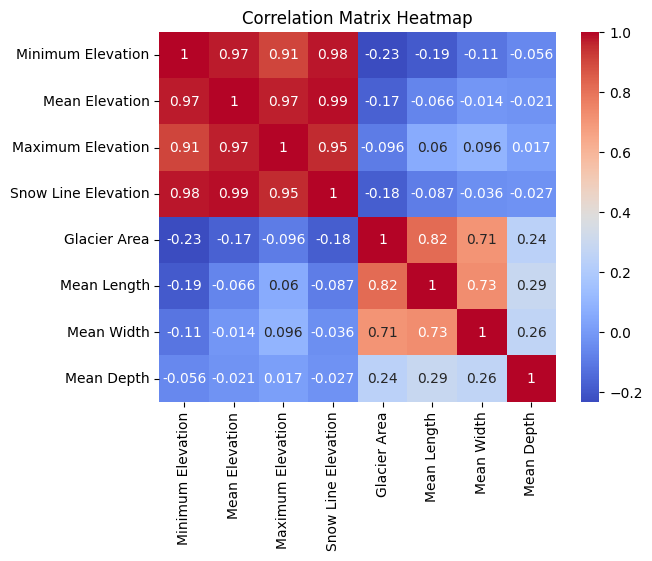

In [9]:
# Calculate the correlation matrix
corr_matrix = worldglacierinventorycondense.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Other Plots (CDF and Histograms)**

Selecting only numeric columns will help with the next two visualizations.

In [24]:
# Select only numeric columns
numeric_columns = worldglacierinventorycondense.select_dtypes(include=[np.number]).columns

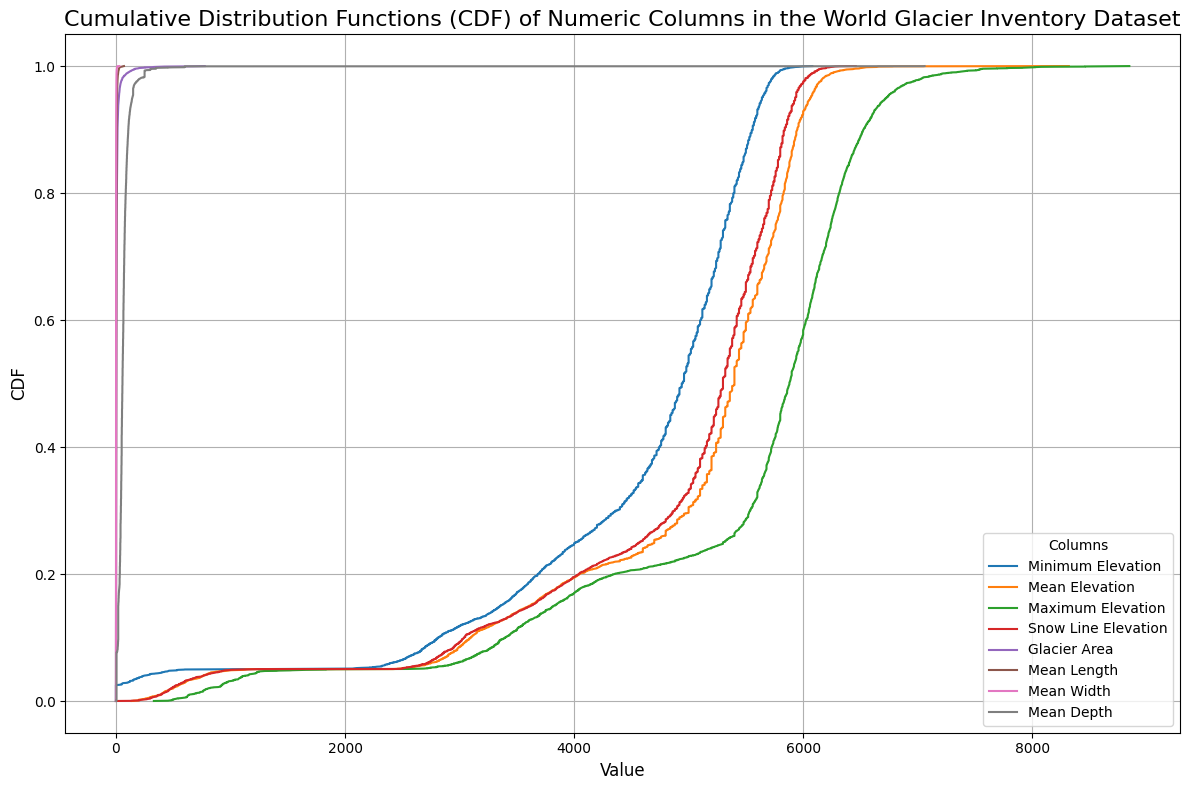

In [32]:
# Create a single CDF plot for all numeric columns
plt.figure(figsize=(12, 8))

for column_name in numeric_columns:
    # Sort the data
    wgidata = worldglacierinventorycondense[column_name].sort_values()

    # Calculate the CDF
    cdf = np.arange(1, len(wgidata) + 1) / len(wgidata)

    # Plot the CDF
    plt.plot(wgidata, cdf, label=column_name)

# Plot characteristics
plt.title('Cumulative Distribution Functions (CDF) of Numeric Columns in the World Glacier Inventory Dataset', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.legend(title='Columns', fontsize=10, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


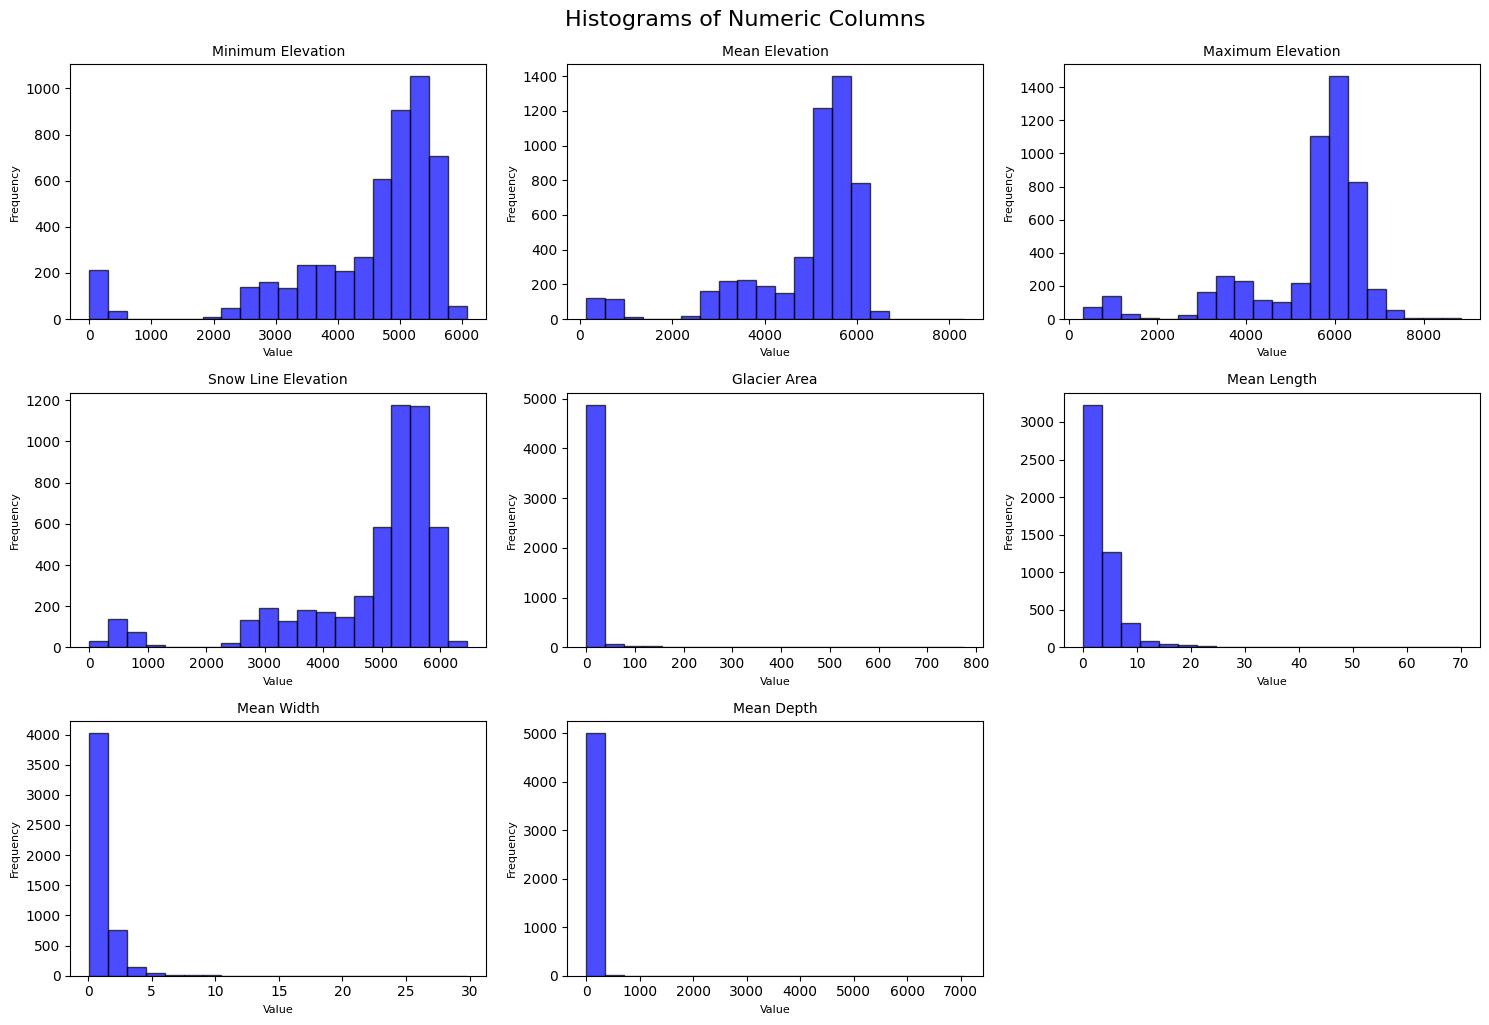

In [33]:
# Create histograms for each numeric column
numeric_columns = numeric_data.columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    plt.hist(numeric_data[column], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(column, fontsize=10)
    plt.xlabel('Value', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.tight_layout()

plt.suptitle("Histograms of Numeric Columns for the World Glacier Inventory Dataset", fontsize=16, y=1.02)
plt.show()

**Analysis**

The dataset reveals that most glaciers are small, short, and narrow, with heavily skewed distributions for metrics like glacier area, mean length, and mean width. These glaciers are predominantly found at higher elevations (4000–6000 meters), as indicated by the steep CDF curves and the histograms. Elevation-related metrics, such as minimum, mean, maximum elevation, and snow line elevation, are highly correlated, while size-related metrics like glacier area, length, and width also exhibit strong positive correlations, reflecting proportional growth in glacier dimensions. Interestingly, there is a weak or negative correlation between elevation metrics and size-related metrics, suggesting that larger glaciers are generally located at lower altitudes. The patterns in the pair plot confirm these relationships, highlighting potential outliers in glacier size metrics that may need attention during analysis. Due to the skewed distributions and high correlations, transformations (e.g., logarithmic scaling) and dimensionality reduction techniques like PCA could improve interpretability and simplify further analyses. These insights suggest potential for clustering glaciers based on their size and elevation characteristics.